In [1]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
library(fpp2)

Loading required package: ggplot2

Loading required package: fma

Loading required package: expsmooth



In [6]:
library(TSA)

Registered S3 methods overwritten by 'TSA':
  method       from    
  fitted.Arima forecast
  plot.Arima   forecast


Attaching package: 'TSA'


The following objects are masked from 'package:stats':

    acf, arima


The following object is masked from 'package:utils':

    tar




In [21]:
ausbeer

,Qtr1,Qtr2,Qtr3,Qtr4
1956,284,213,227,308
1957,262,228,236,320
1958,272,233,237,313
1959,261,227,250,314
1960,286,227,260,311
1961,295,233,257,339
1962,279,250,270,346
1963,294,255,278,363
1964,313,273,300,370
1965,331,288,306,386


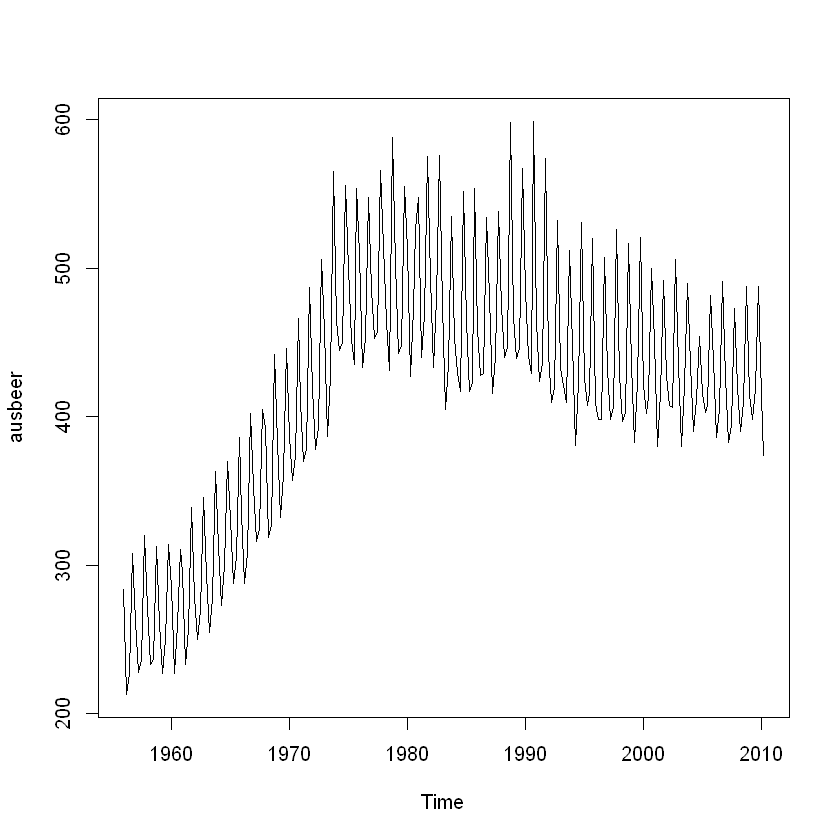

In [22]:
plot(ausbeer)

In [24]:
beer_train<-window(ausbeer, start=c(1956,1), end=c(2006,4))
beer_train

,Qtr1,Qtr2,Qtr3,Qtr4
1956,284,213,227,308
1957,262,228,236,320
1958,272,233,237,313
1959,261,227,250,314
1960,286,227,260,311
1961,295,233,257,339
1962,279,250,270,346
1963,294,255,278,363
1964,313,273,300,370
1965,331,288,306,386


In [26]:
# average method :과거의 데이터의 평균값으로 미래값 하나로 예측
for_mean<-meanf(beer_train, h=14)
# naive method : 주어진 마지막 데이터로 미래값 하나로 예측
for_naive<-naive(beer_train, h=14)
# seasonal naive method : 이전 계절값들 이용
for_snaive<-snaive(beer_train, h=14)
# Drift method : 데이터의 처음과 마지막 관찰값을 직선으로 연결
for_drift<-rwf(beer_train, drift=TRUE, h=14)
# Drift= False이면 naive method(마지막 데이터로 미래값 하나로예측하는 것과 똑같음)
for_drift_f<-rwf(beer_train, drift=FALSE, h=14)


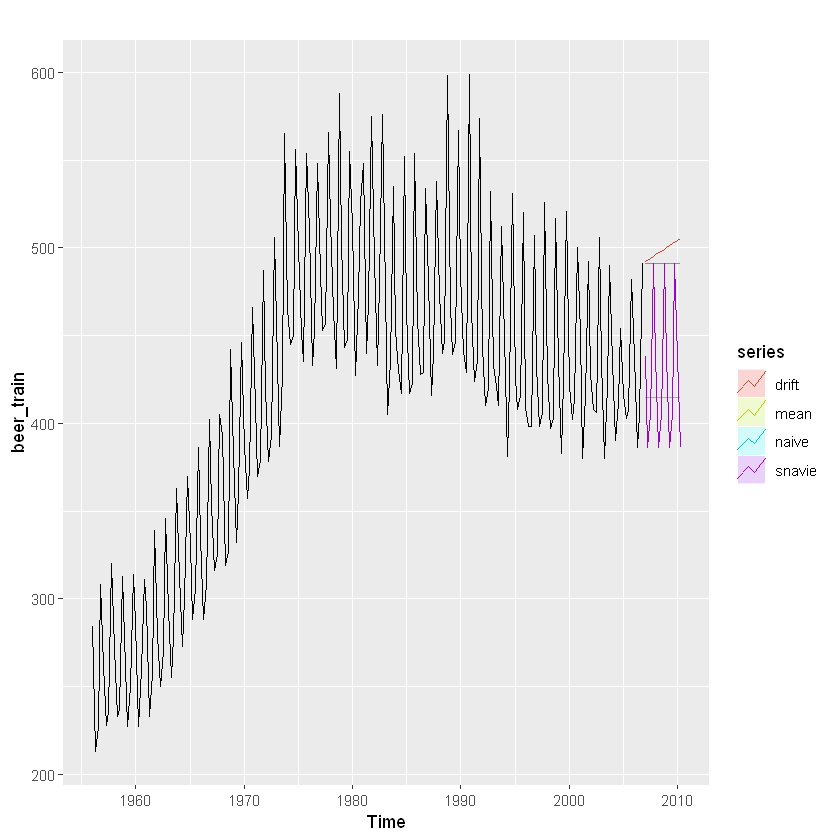

In [28]:
autoplot(beer_train)+
autolayer(for_mean, series='mean', PI=FALSE)+
autolayer(for_naive, series='naive', PI=FALSE)+
autolayer(for_snaive, series='snavie', PI=FALSE)+
autolayer(for_drift, series='drift', PI=FALSE)


In [29]:
beer_test<-window(ausbeer, start=c(2007,1))
beer_test

,Qtr1,Qtr2,Qtr3,Qtr4
2007,427,383,394,473
2008,420,390,410,488
2009,415,398,419,488
2010,414,374,,


In [31]:
accuracy(for_mean, beer_test)
accuracy(for_naive, beer_test)
accuracy(for_snaive, beer_test)
accuracy(for_drift, beer_test)


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-8.938622e-15,88.06799,68.06017,-5.5088469,18.817320,4.275136,0.6914980,NA
Test set,5.938375e+00,36.14912,26.21429,0.7412982,5.994566,1.646626,-0.0849477,0.7445247


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,1.019704,68.52776,57.36453,-0.972654,13.54921,3.603300,-0.2210823,NA
Test set,-70.071429,78.62252,70.07143,-17.438973,17.43897,4.401472,-0.0849477,1.547821


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,3.44,19.75171,15.92,0.9302419,3.792287,1.0000000,0.0007894127,NA
Test set,-6.50,13.48809,11.50,-1.5298792,2.758667,0.7223618,0.1614676553,0.2517655


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-1.918211e-14,68.52018,57.41998,-1.231416,13.57492,3.606783,-0.2210823,NA
Test set,-7.771921e+01,85.53827,77.71921,-19.266286,19.26629,4.881860,-0.1061944,1.686005
